## Introduction

This notebook contains an attempt to solve the [House Prices](https://www.kaggle.com/vikrishnan/house-sales-price-using-regression) regression challenge at Kaggle. If you are going to run this notebook, you should also download the challenge data into a directory `Data/` in the same directory as this notebook.

## Understanding the data 

First things first. We need to understand our data. Lets start by taking a look at the training data.

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
# Setting notebook configs
%matplotlib inline

In [2]:
# Loading data
# keep_default_na is set here so that 'NA' values are not parsed as NaN
train = pd.read_csv("Data/train.csv",keep_default_na=False)
test = pd.read_csv("Data/test.csv",keep_default_na=False)
# Describing the data
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [3]:
train.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Good**. The value we are trying to predict is the `SalePrice`, the last column of the training data. We can see that it is not available in the test data. Now we should plot the data to see if there are any obvious correlations between the attributes, but before that we will remove the ID column and save it elsewhere. 

In [4]:
# Saving the ids
train_idd = train['Id']
test_id = test['Id']
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

Starting with an histogram of the SalePrice variable:

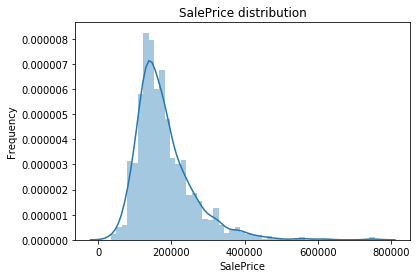

<Figure size 432x288 with 0 Axes>

In [5]:
sns.distplot(train['SalePrice']);
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
fig = plt.figure()
plt.show()

Now a correlation matrix with all the variables:

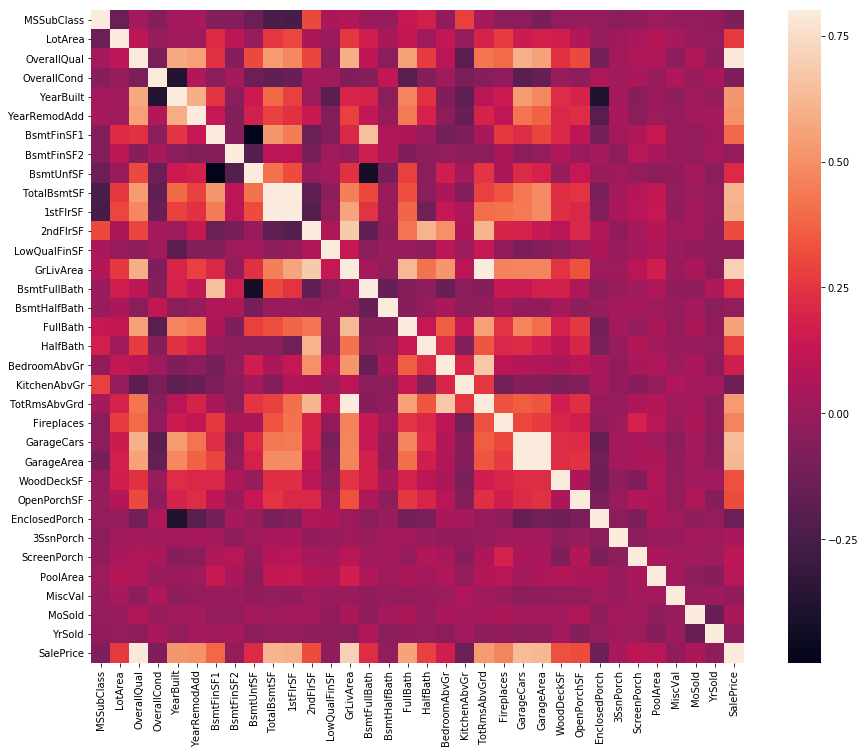

In [6]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, square=True)

Looking specifically at the SalePrice variable, we can see some very interesting features. The variable seems to be well correlated with some other variables such as `OverallQual`, `GrLivArea` and a few others. Looking at the `data_description.txt` file, we see that:

```
OverallQual: Rates the overall material and finish of the house
       10	Very Excellent
       [...]
       1	Very Poor
       
[...]

GrLivArea: Above grade (ground) living area square feet
```

This is a great start, but we must still look further into the data. Lets rank the other variables by their correlation with `SalePrice` and remove the least correlated by an arbitrary `0.5` correlation value:

In [7]:
most_corr = pd.DataFrame(corrmat['SalePrice'])
most_corr = most_corr[most_corr.SalePrice > 0.5]
most_corr

,SalePrice
OverallQual,0.790982
YearBuilt,0.522897
YearRemodAdd,0.507101
TotalBsmtSF,0.613581
1stFlrSF,0.605852
GrLivArea,0.708624
FullBath,0.560664
TotRmsAbvGrd,0.533723
GarageCars,0.640409
GarageArea,0.623431


So we have **10** most correlated features - all of them numerical! Lets plot them aggregating the price values in ranges:

In [8]:
new_set = pd.DataFrame(train)
bucket_size = 100000
for feature in train.axes[1]:
    if feature not in most_corr.axes[0]:
        new_set.drop(feature, axis = 1, inplace = True)
    
new_set.drop("SalePrice", axis = 1, inplace = True)
new_set["SalePriceRange"] =[str((int(x) // bucket_size) * bucket_size) for x in train["SalePrice"]]
new_set["SalePriceRange"].describe()

count       1460
unique         8
top       100000
freq         911
Name: SalePriceRange, dtype: object

ValueError: color kwarg must have one color per dataset

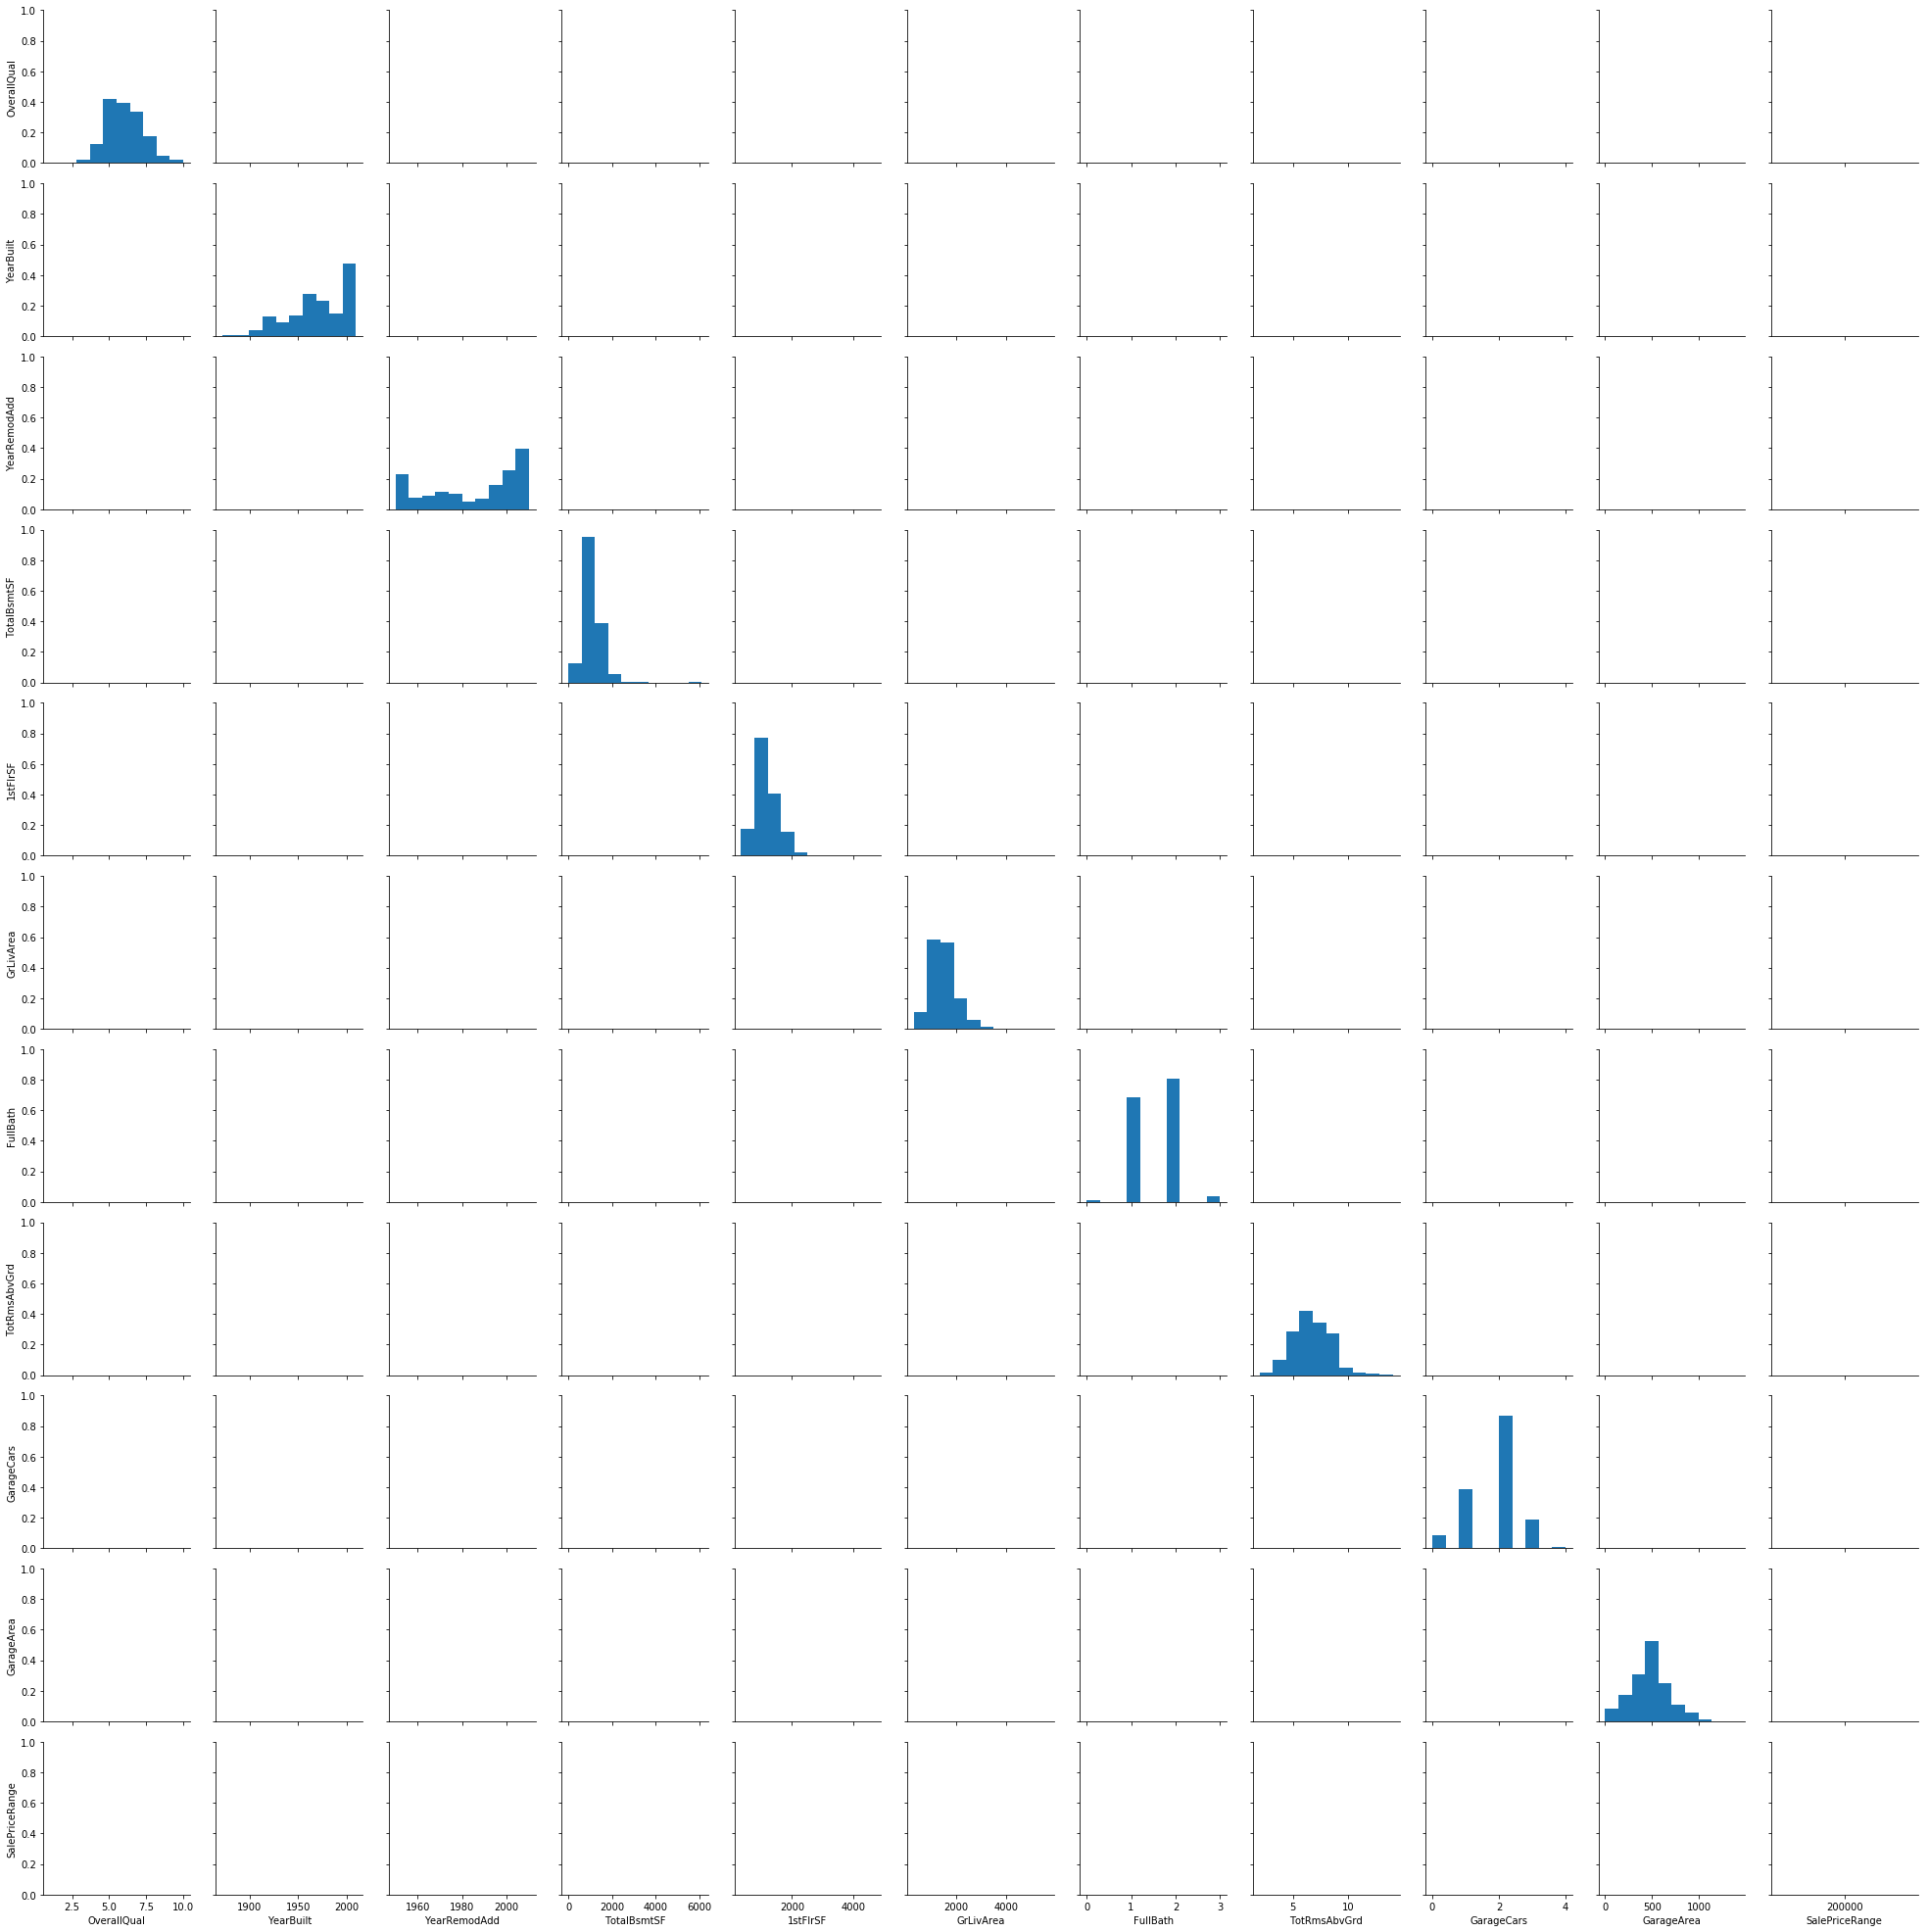

In [22]:
g = sns.PairGrid(new_set, hue="SalePriceRange")
g.map_diag(plt.hist)
#g.map_offdiag(plt.scatter)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.add_legend();


In [24]:
a = [1,2,3,[1,2]]
np.linspace(a)

TypeError: linspace() missing 1 required positional argument: 'stop'